In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import tree
from itertools import combinations

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Лабораторная работа 3.
Деревья решений. Ансамбли решающих деревьев.
## Задание.
1. Выбрать подходящую таблицу данных. Построить и визуализировать дерево решений.
2. Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.
3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.
4. Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.
Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров.
5. Выполнить предыдущий пункт для случайного леса.



Дата сет Титаник

survived (выжил): выжил ли пассажир (1) или нет (0).

pclass (класс билета): Класс пассажир (1, 2 или 3).

sex (пол): Пол пассажира (мужской или женский).

age (возраст): Возраст пассажира.

sibsp (число братьев/сестер/супругов на борту): Количество родственников пассажира, находящихся на борту.

parch (число родителей/детей на борту): Количество родственников пассажира, связанных с ним на борту.

fare (плата за проезд): Сумма денег, которую пассажир заплатил за билет.

embarked (порт посадки): Порт, в котором пассажир сел на борт (C - Cherbourg, Q - Queenstown, S - Southampton).

class (класс билета): Тот же признак, что и pclass, но в виде строк (First, Second, Third).

who (кто): является ли пассажир взрослым, ребенком или женщиной.

adult_male (взрослый мужчина): Бинарный признак, указывающий, является ли пассажир взрослым мужчиной.

deck (палуба): Палуба, на которой находилась каюта пассажира.

embark_town (город посадки): Город, в котором пассажир сел на борт.

alive (жив): Текстовый признак, указывающий, выжил ли пассажир.

alone (один): Бинарный признак, указывающий, путешествовал ли пассажир один или с родственниками.

# загрузка датасета

In [31]:
# Загрузите данные в DataFrame (замените 'your_data.csv' на ваш файл данных)
data = sns.load_dataset('titanic')

# Посмотрим на первые несколько строк датасета
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# характеристика дата сета

- количество данных - 890

- количесвто признаков - 15

- дата сет не сбалансированный

Категориальные данные:

-- sex: Пол пассажира (мужской или женский).

-- embarked: Порт посадки (C - Cherbourg, Q - Queenstown, S - Southampton).

-- class: Класс билета (First, Second, Third).

-- who: Категория, пассажир взрослым, ребенком или женщиной.
embark_town: Город посадки.

-- pclass: Класс билета

-- deck: Палуба, на которой находилась каюта пассажира (содержит буквенные значения).

Бинарные данные:

-- survived: Выжил ли 

-- adult_male: Является ли взрослым мужчиной (True или False).

-- alive: Текстовая версия столбца survived.


Числовые данные:

-- age: Возраст пассажира.

-- sibsp: Количество братьев, сестер, супругов на борту.

-- parch: Количество родителей, детей на борту.

-- fare: Плата за проезд.



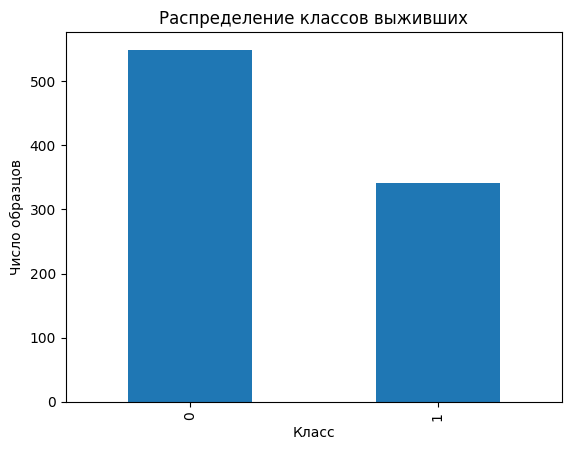

In [32]:
# print(data.value_counts)
class_distribution = data['survived'].value_counts()

class_distribution.plot(kind='bar')
plt.title('Распределение классов выживших')
plt.xlabel('Класс')
plt.ylabel('Число образцов')
plt.show()

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

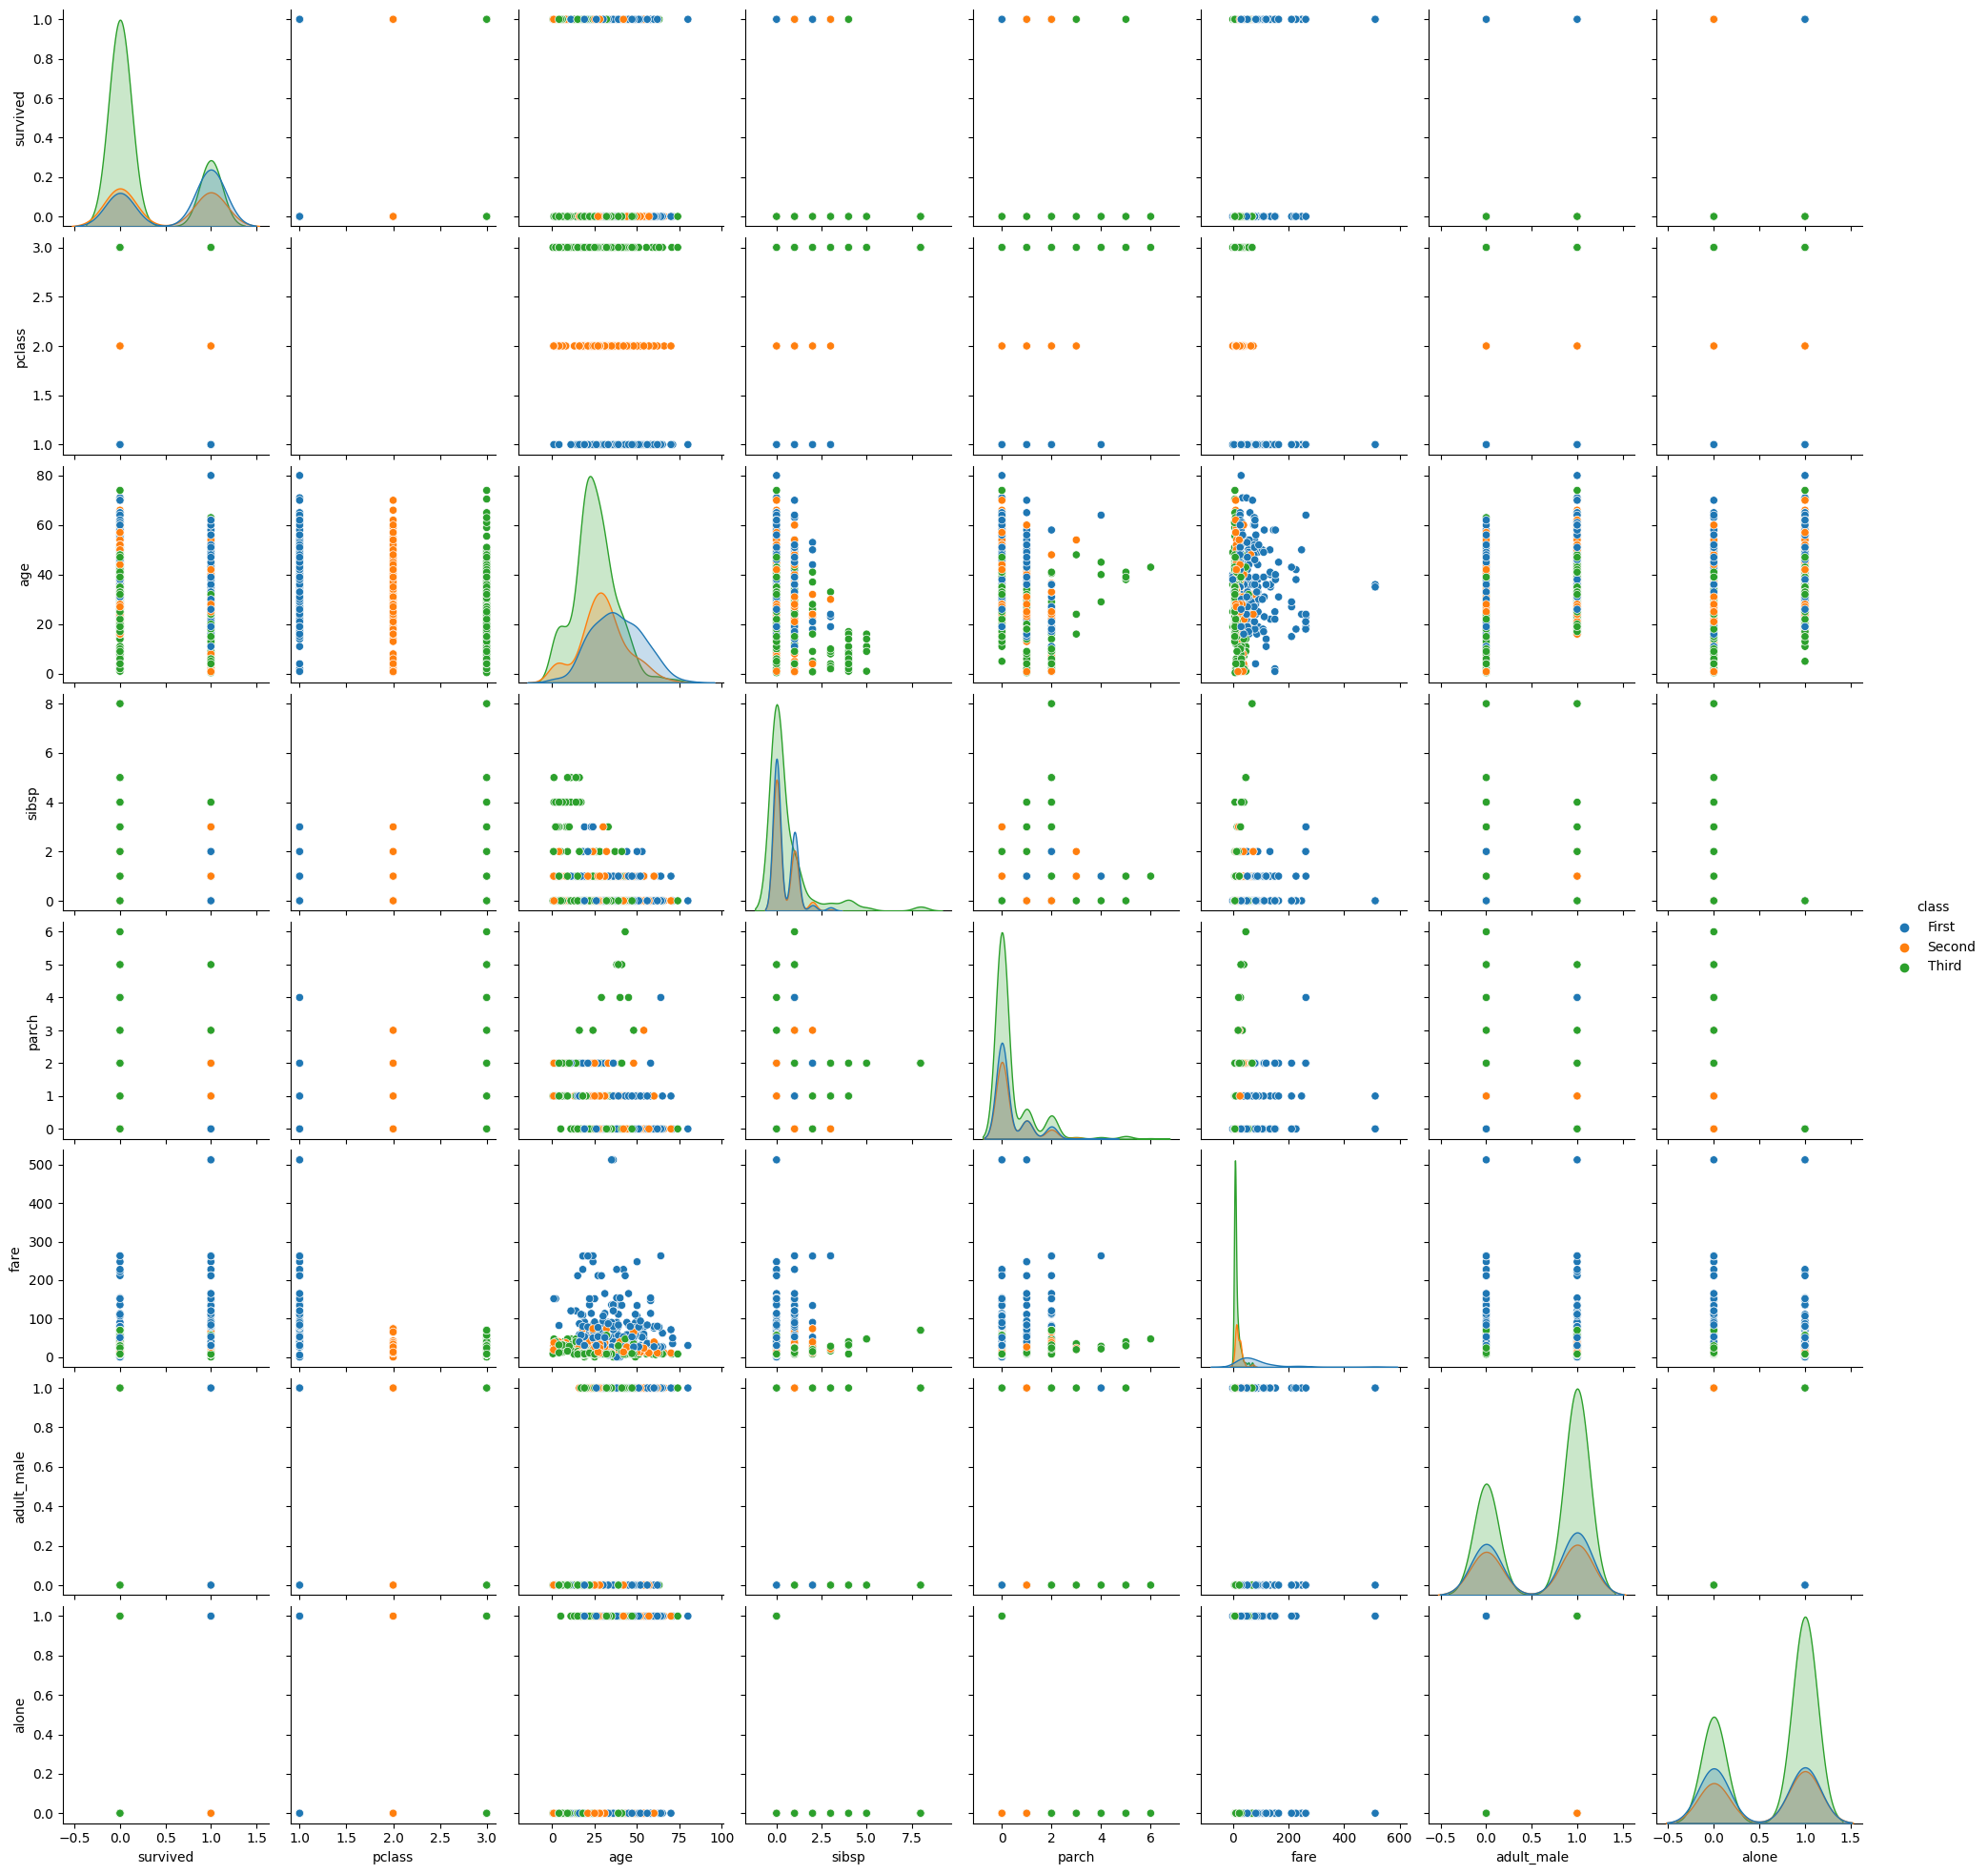

In [33]:
sns.pairplot(data, hue='class')
plt.show()

In [34]:
# Подсчет количества строк с NaN значениями
nan_count = data.isna().sum(axis=1)

# Вывод результата
print("Количество строк с NaN значениями:", nan_count.sum())
# ----------------------------------------------
data = data.drop(['alive', 'deck'], axis=1)

# Подсчет количества строк с NaN значениями
nan_count = data.isna().sum(axis=1)

# Вывод результата
print("Количество строк с NaN значениями:", nan_count.sum())

Количество строк с NaN значениями: 869
Количество строк с NaN значениями: 181


In [35]:
exclude_features = ['deck', 'survived', 'alive']
features = [col for col in data.columns if col not in exclude_features]
print(features)

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']


# Нормализуем наши данные

In [36]:
X = data.drop('survived', axis=1)
y = data['survived']

# простой способ сохранить баланс в данных, избежать искажения распределения и не внести слишком много шума, который мог 
# бы возникнуть при использовании других методов заполнения, таких как медиана или мода.
# замените пропущенные значения (NaN) средним значением для числовых признаков
X['age'].fillna(X['age'].mean(), inplace=True)
X['fare'].fillna(X['fare'].mean(), inplace=True)

# замените пропущенные значения (NaN) наиболее часто встречающимся значением для категориальных признаков
X['embarked'].fillna(X['embarked'].mode()[0], inplace=True)

# преобразуйте категориальные признаки в числовые
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Функции

In [38]:
def printDividingPlane(selected_features, depth):
    print(selected_features)

    feature_pairs = list(combinations(selected_features, 2))

    # Остальной код остается неизменным
    num_rows = (len(feature_pairs) + 3) // 4
    num_cols = min(len(feature_pairs), 4)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    for i, pair in enumerate(feature_pairs):
        feature1, feature2 = pair
        X_pair = X[[feature1, feature2]]
        clf_pair = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf_pair.fit(X_pair, y)
        
        # Построение графика рассеяния (точек)
        scatter = axes[i].scatter(X_pair[feature1], X_pair[feature2], c=y, cmap='viridis', edgecolor='k', s=20, label='Выживший')
        
        # Добавление легенды для цветов точек
        axes[i].legend(*scatter.legend_elements(), title='Выживший', loc="upper right")
        
        # Построение графика решающей плоскости
        x_min, x_max = X_pair[feature1].min() - 1, X_pair[feature1].max() + 1
        y_min, y_max = X_pair[feature2].min() - 1, X_pair[feature2].max() + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = clf_pair.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        
        axes[i].set_xlabel(feature1)
        axes[i].set_ylabel(feature2)
        axes[i].set_title(f'{feature1} vs {feature2}')
    plt.tight_layout()
    plt.show()

def printDividingPlaneBoost(selected_features, num_trees_to_display, max_depth=3):
    feature_pairs = list(combinations(selected_features, 2))
    # Остальной код остается неизменным
    num_rows = (len(feature_pairs) + 3) // 4
    num_cols = min(len(feature_pairs), 4)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    for i, pair in enumerate(feature_pairs):
        feature1, feature2 = pair
        X_pair = X_train[[feature1, feature2]]
        
        # Используем GradientBoostingClassifier
        clf_pair = GradientBoostingClassifier(n_estimators=num_trees_to_display, max_depth=max_depth, random_state=42)
        clf_pair.fit(X_pair, y_train)
        
        # Построение графика рассеяния (точек)
        scatter = axes[i].scatter(X_pair[feature1], X_pair[feature2], c=y_train, cmap='viridis', edgecolor='k', s=20, label='Survived')
        
        # Добавление легенды для цветов точек
        axes[i].legend(*scatter.legend_elements(), title='Survived', loc="upper right")
        
        # Построение графика решающей плоскости
        x_min, x_max = X_pair[feature1].min() - 1, X_pair[feature1].max() + 1
        y_min, y_max = X_pair[feature2].min() - 1, X_pair[feature2].max() + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = clf_pair.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        
        axes[i].set_xlabel(feature1)
        axes[i].set_ylabel(feature2)
        axes[i].set_title(f'{feature1} vs {feature2}')
    plt.tight_layout()
    plt.show()

# 1 Дерево решений

Дерево решений - это метод машинного обучения, который используется для решения задач классификации и регрессии. Оно представляет собой структуру в виде дерева, где каждый узел представляет собой решающее правило, разделяющее данные на подгруппы. Вот основные концепции, как работает дерево решений:

на каждом уровне дерева алгоритм выбирает какой признак лучше всего разделяет данные.

- Корень дерева: Представляет начальное разделение данных на основе выбранного признака.
- Узлы: Представляют дополнительные разделения, основанные на условиях, которые лучше всего уменьшают неопределенность данных.
- Листья: Содержат прогнозы, такие как классы (в задаче классификации) или числовые значения (в задаче регрессии).

Если ваше дерево решений содержит корень и два листа, это может означать, что было выполнено одно разделение данных. Каждый лист представляет подгруппу данных, которая, согласно логике дерева, должна быть отнесена к определенному классу или иметь определенное числовое значение (в зависимости от типа задачи).

Если ваши данные недостаточно сложны, даже увеличение глубины дерева может не привести к дополнительным разбиениям, поскольку дополнительные разбиения не приводят к улучшению качества модели.

alive_no <= 0.5:

Это условие разделения узла. Оно говорит о том, что для данных, для которых значение признака "alive_no" меньше или равно 0.5, перейдем в левую ветвь дерева, в противном случае - в правую ветвь.

gini = 0.469:

Индекс Джини (Gini index) используется для измерения "чистоты" узла. Чем меньше Gini, тем лучше. В данном случае, Gini index для этого узла равен 0.469.

samples = 712:

Это общее количество образцов (наблюдений), находящихся в этом узле. В данном случае, у нас есть 712 образцов.

value = [444, 268]:

Это количество образцов (из samples), которые принадлежат каждому классу. В данном случае, у нас есть два класса (0 и 1), и [444, 268] означает, что 444 образца принадлежат классу 0, а 268 образцов - классу 1.

class=0:

Это прогноз класса для этого узла. В данном случае, узел классифицируется как класс 0. Это определено большинством образцов в узле.
Таким образом, данный узел говорит о том, что для образцов, у которых "alive_no" <= 0.5, большинство принадлежит классу 0, и для этого узла используется Gini index равный 0.469. Эта информация представляет собой логику принятия решений для данного узла в дереве.

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


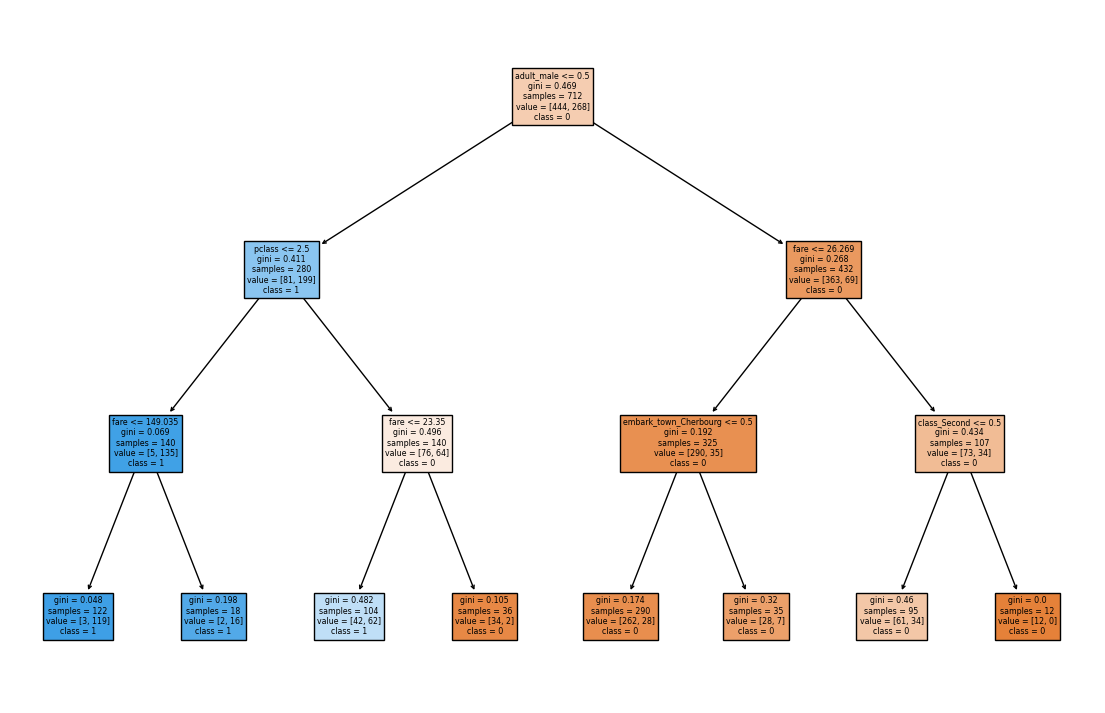

In [39]:
# Постройте дерево решений
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(14, 9))
tree.plot_tree(clf, feature_names=X.columns, class_names=list(map(str, clf.classes_)), filled=True, ax=ax)
plt.show()

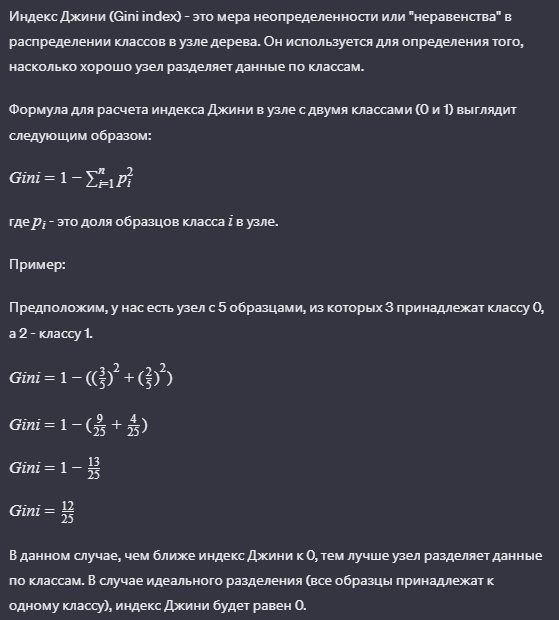

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


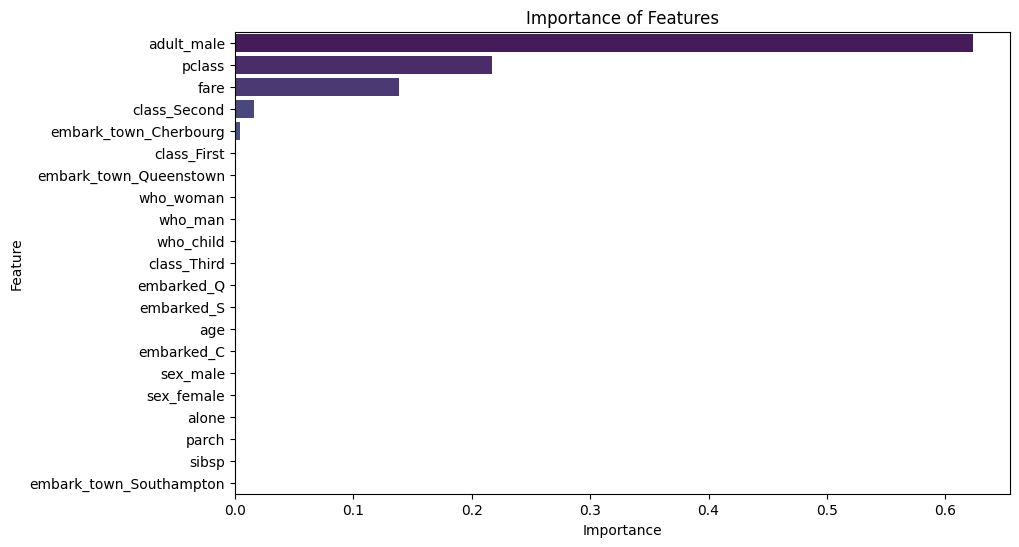

pclass: 0.21752873383019586
age: 0.0
sibsp: 0.0
parch: 0.0
fare: 0.13876865412024353
adult_male: 0.6231755949571575
alone: 0.0
sex_female: 0.0
sex_male: 0.0
embarked_C: 0.0
embarked_Q: 0.0
embarked_S: 0.0
class_First: 0.0
class_Second: 0.01648882326348232
class_Third: 0.0
who_child: 0.0
who_man: 0.0
who_woman: 0.0
embark_town_Cherbourg: 0.0040381938289208354
embark_town_Queenstown: 0.0
embark_town_Southampton: 0.0


In [40]:
# Важность признаков
feature_importance = clf.feature_importances_

# Создание DataFrame для удобства визуализации
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Построение бар-графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importance of Features')
plt.show()

for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

по графику можем заметить что наше дерево выделила главные признаки 
 - adult_male, 
 - pclass, 
 - fare, 
 - class_Second, 
 - embark_town_Cherbourg. 
 
 По ним и будем строить решающие плоскости.

['adult_male', 'pclass', 'fare', 'class_Second', 'embark_town_Cherbourg']


c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTr

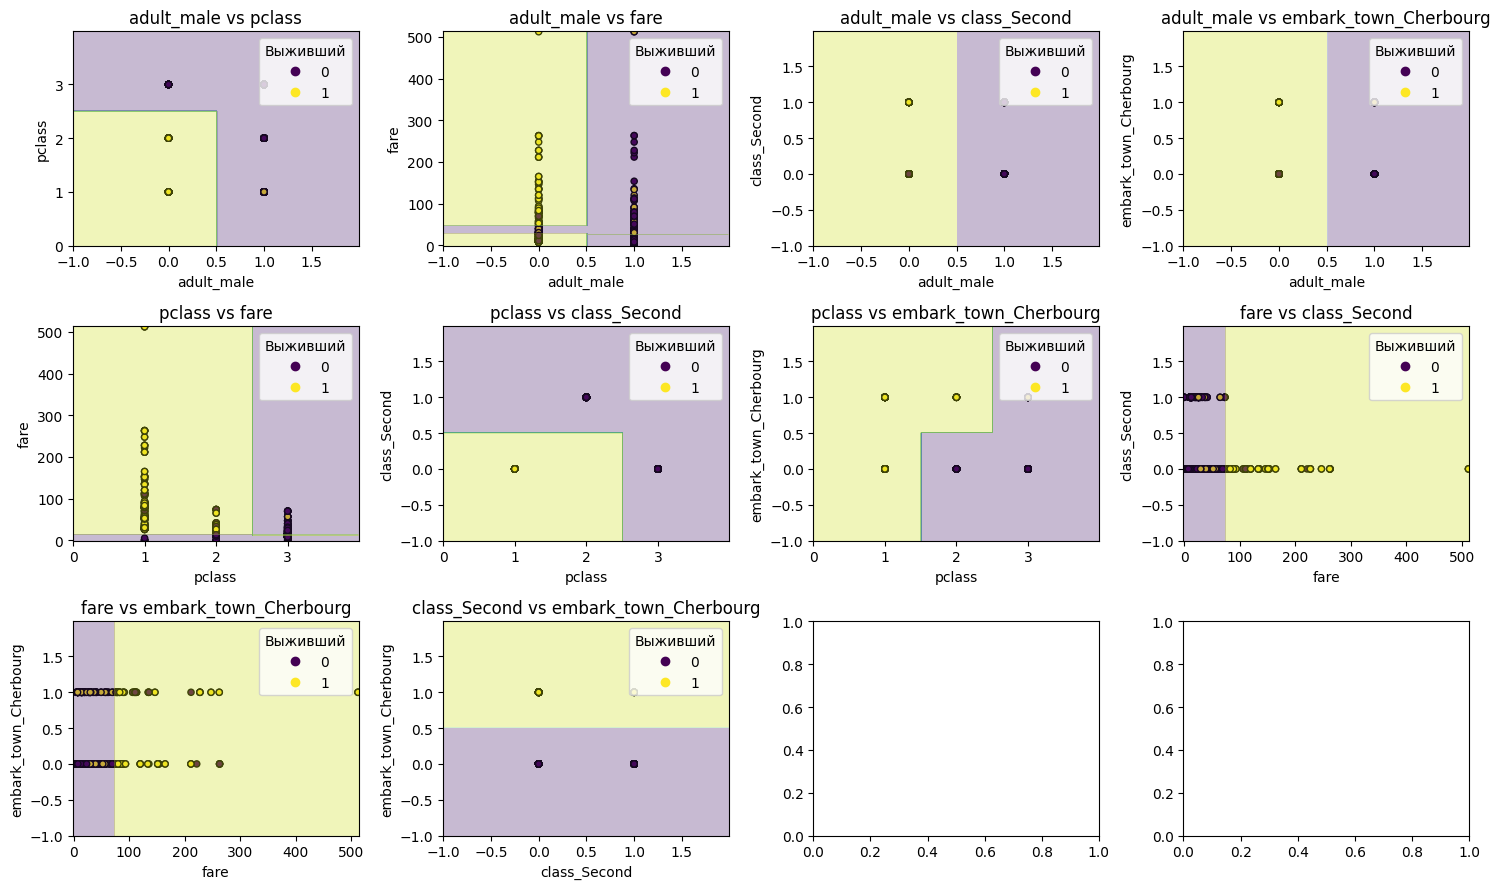

In [41]:
# n_features_to_plot = 20  # Замените это числом признаков, которые вы хотите включить
# selected_features = X.columns[:n_features_to_plot]
# 1 (выжил) или классу 0 (не выжил) 
selected_features = ['adult_male', 'pclass', 'fare', 'class_Second', 'embark_town_Cherbourg']
printDividingPlane(selected_features, 3)


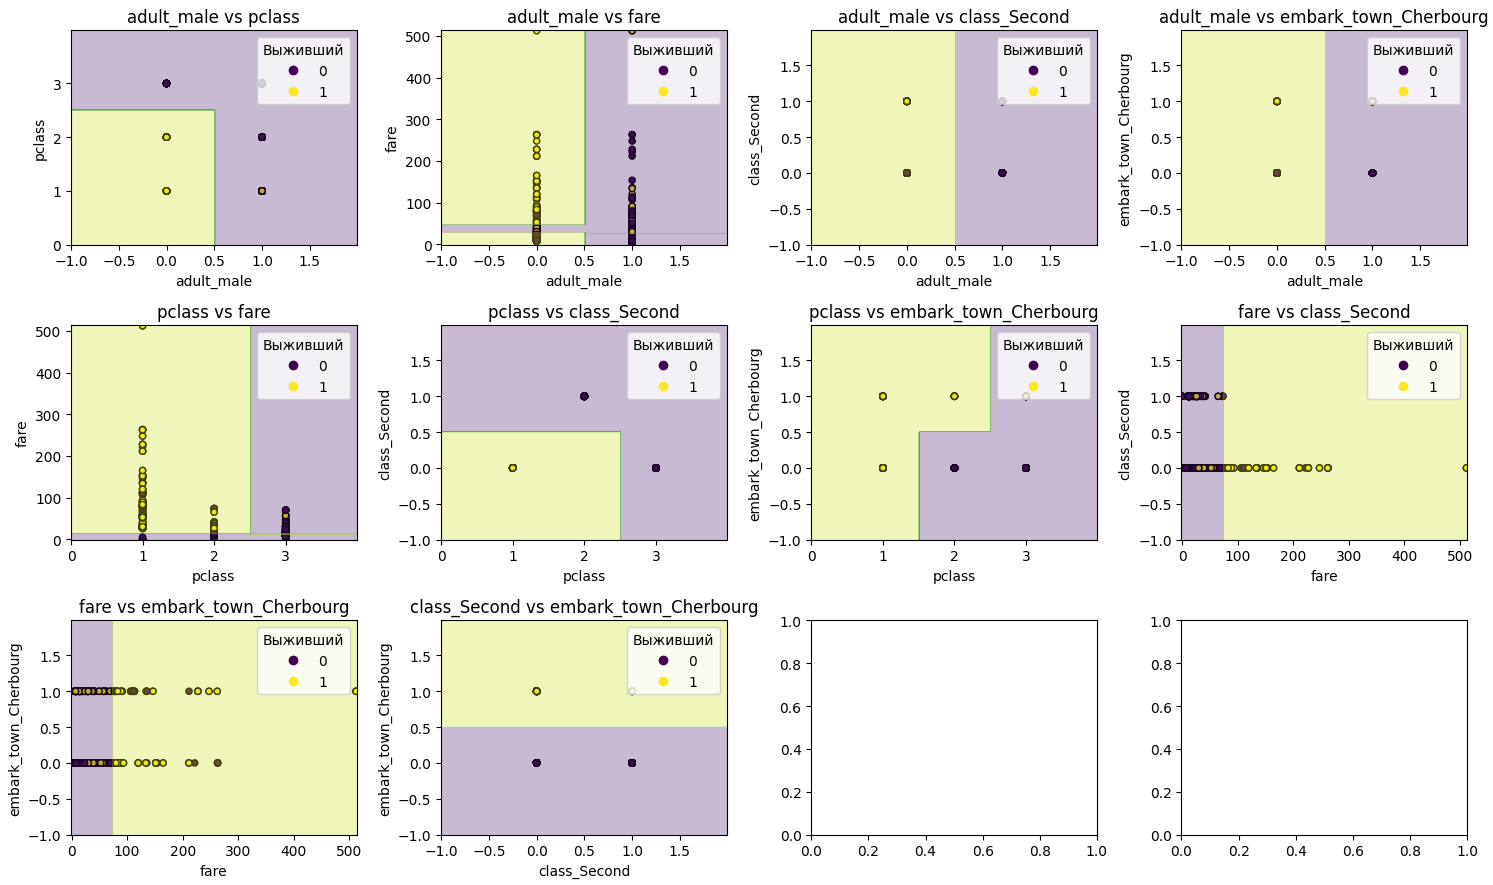

# 2 градиент бустинг

Градиентный бустинг - это алгоритм машинного обучения, который использует комбинацию слабых моделей (обычно деревьев решений) для создания сильной предсказательной модели. Основная идея заключается в построении последовательности деревьев, каждое из которых исправляет ошибки предыдущего.

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


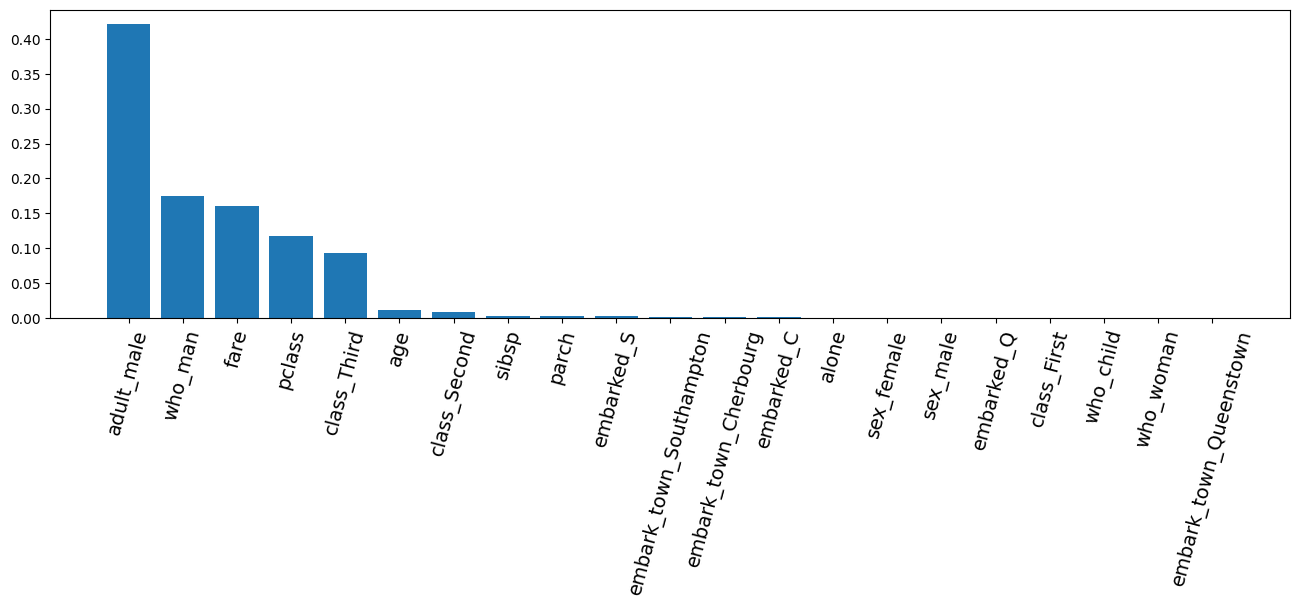

In [42]:

# Количество деревьев для отображения
num_trees_to_display = 20

gb_model = GradientBoostingClassifier(n_estimators=num_trees_to_display, random_state=42)

gb_model.fit(X_train, y_train)

feature_importance = gb_model.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

variables, importance = zip(*sorted_feature_importance)
fig = plt.figure(figsize=(16, 4))
plt.bar(variables, importance)
plt.xticks(fontsize=14,rotation=75)
plt.show()

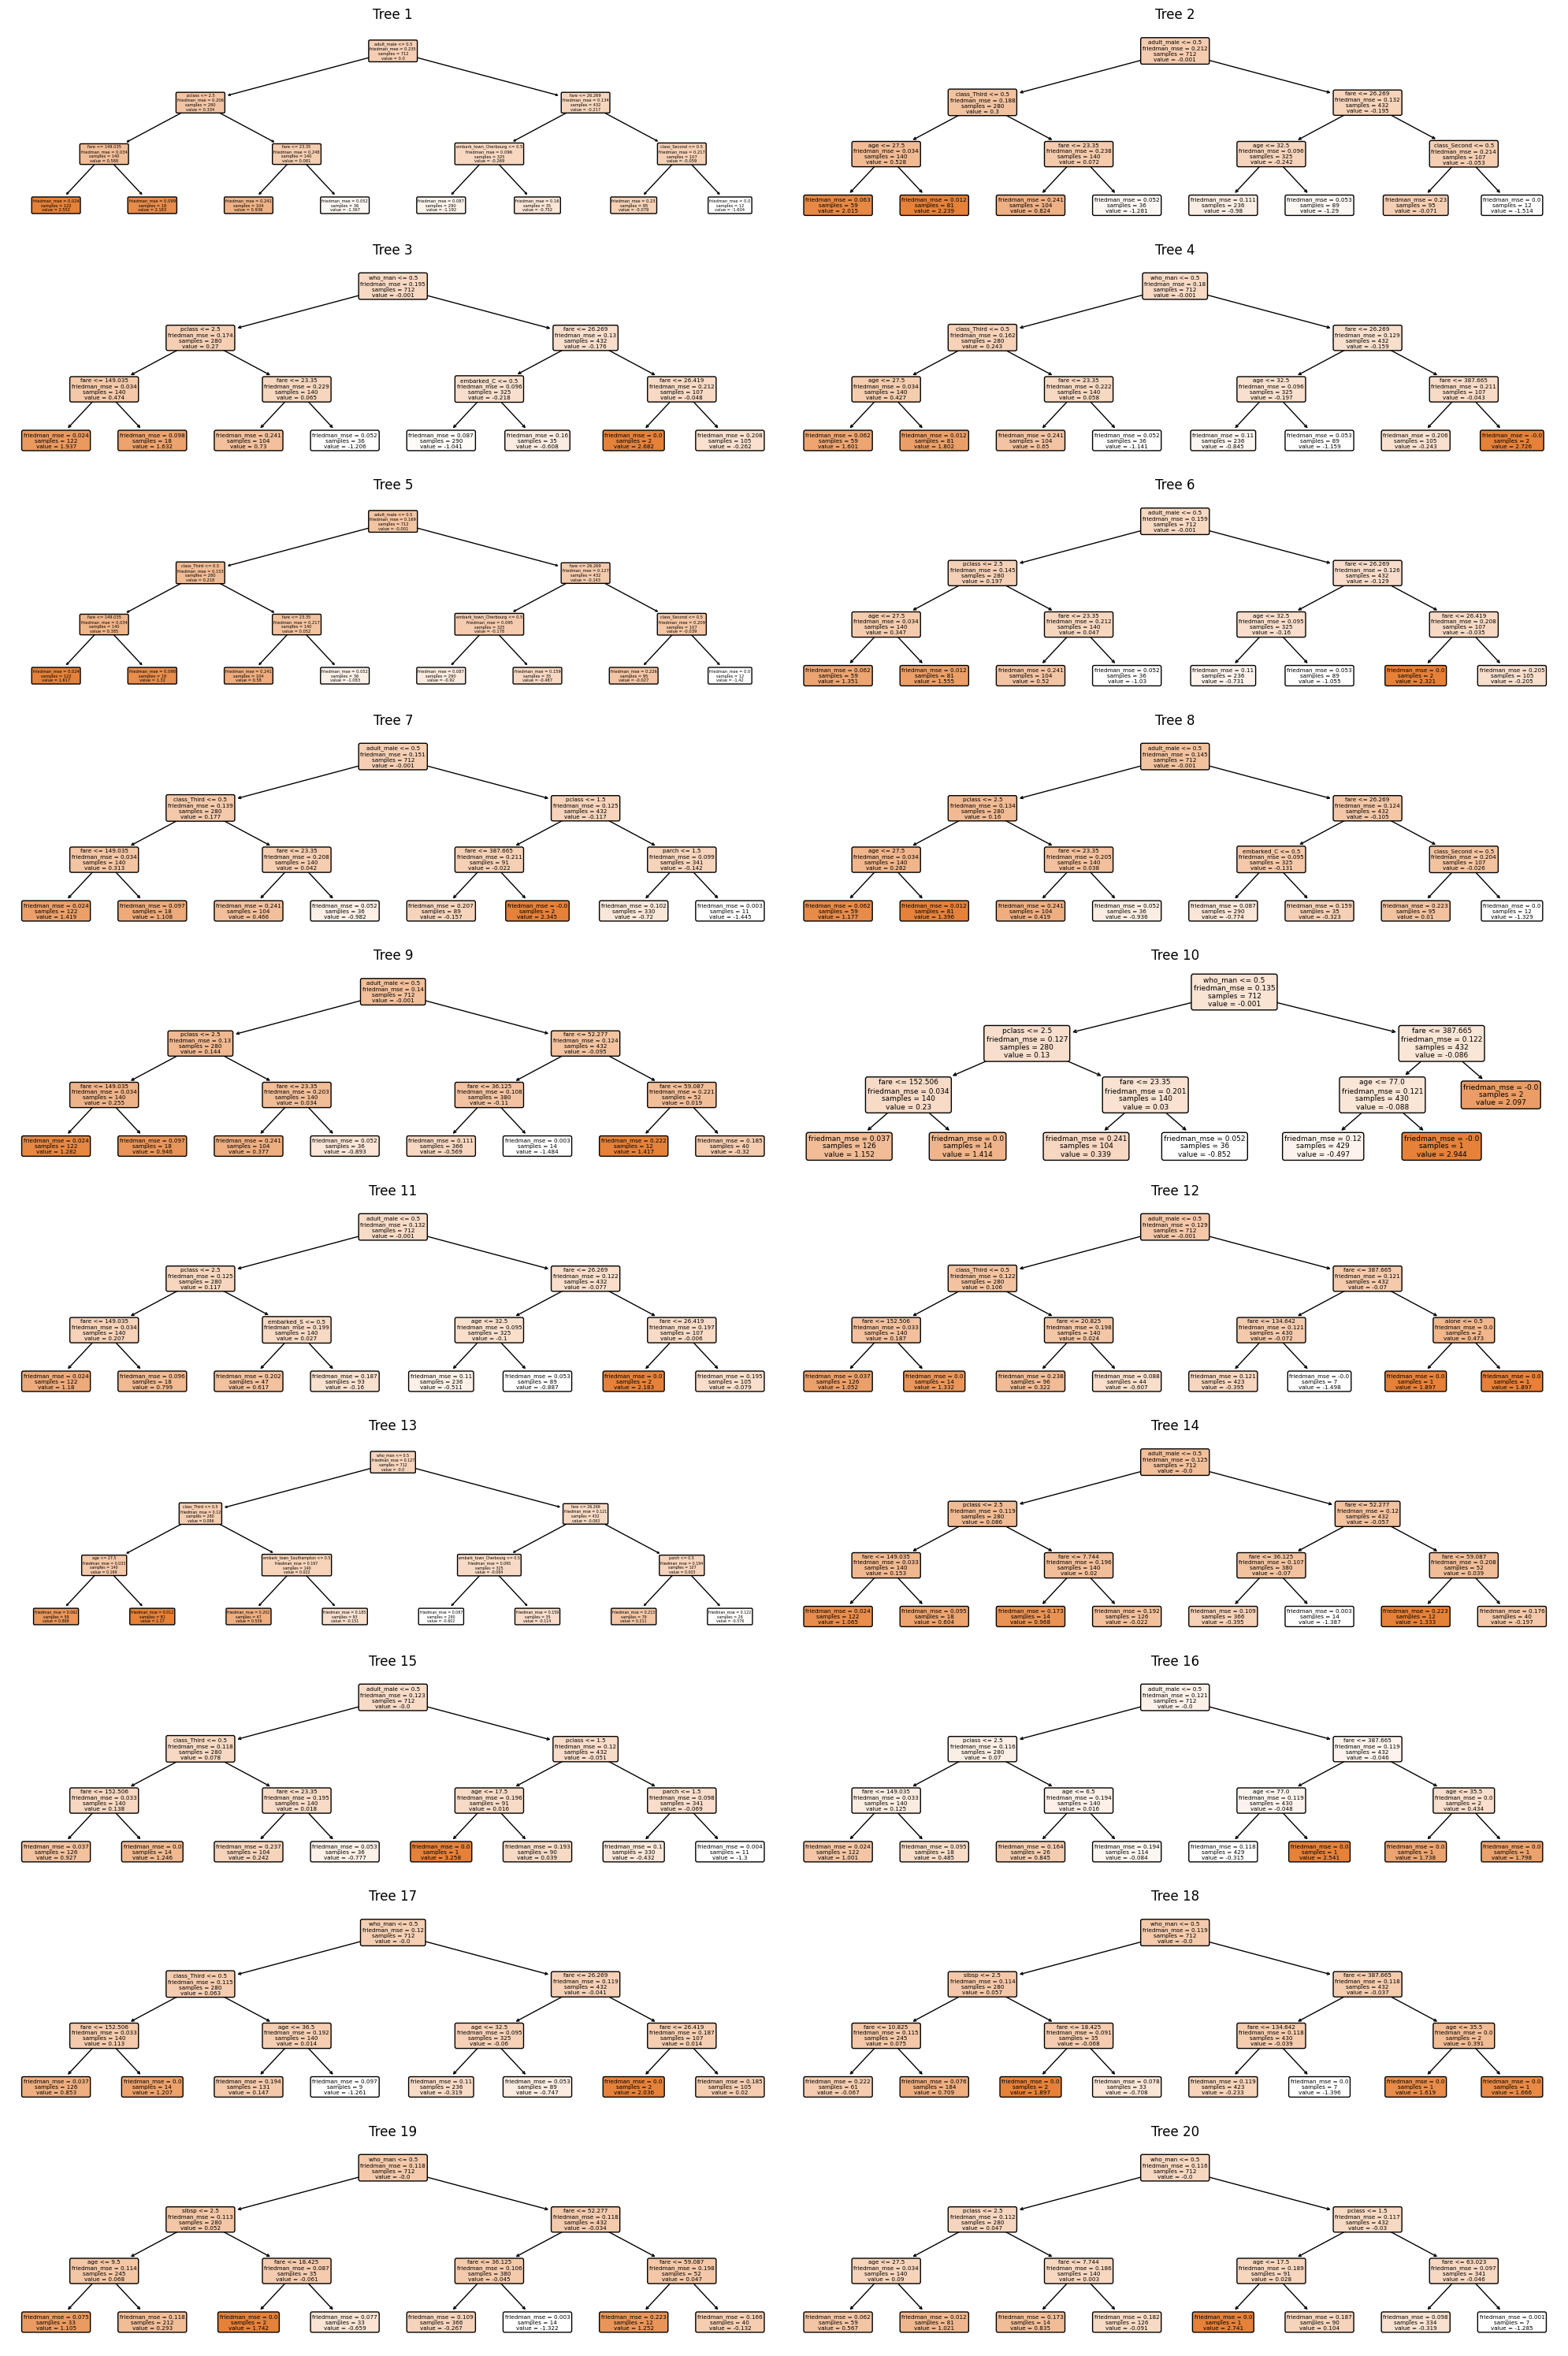

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Определение количества столбцов и строк в сетке
num_cols = 2
num_rows = (num_trees_to_display + num_cols - 1) // num_cols

# Обучение и отображение первых 20 деревьев
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

for i in range(num_trees_to_display):
    row = i // num_cols
    col = i % num_cols

    # Вычисление позиции текущего дерева в сетке
    ax = axes[row, col]

    # Отображение текущего дерева
    plot_tree(gb_model.estimators_[i, 0], filled=True, feature_names=X.columns, class_names=True, rounded=True, ax=ax)
    
    ax.set_title(f'Tree {i+1}')

plt.tight_layout()
plt.show()

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

Средняя глубина деревьев: 3.0
Среднее количество узлов: 14.9
Среднее количество листьев: 7.95


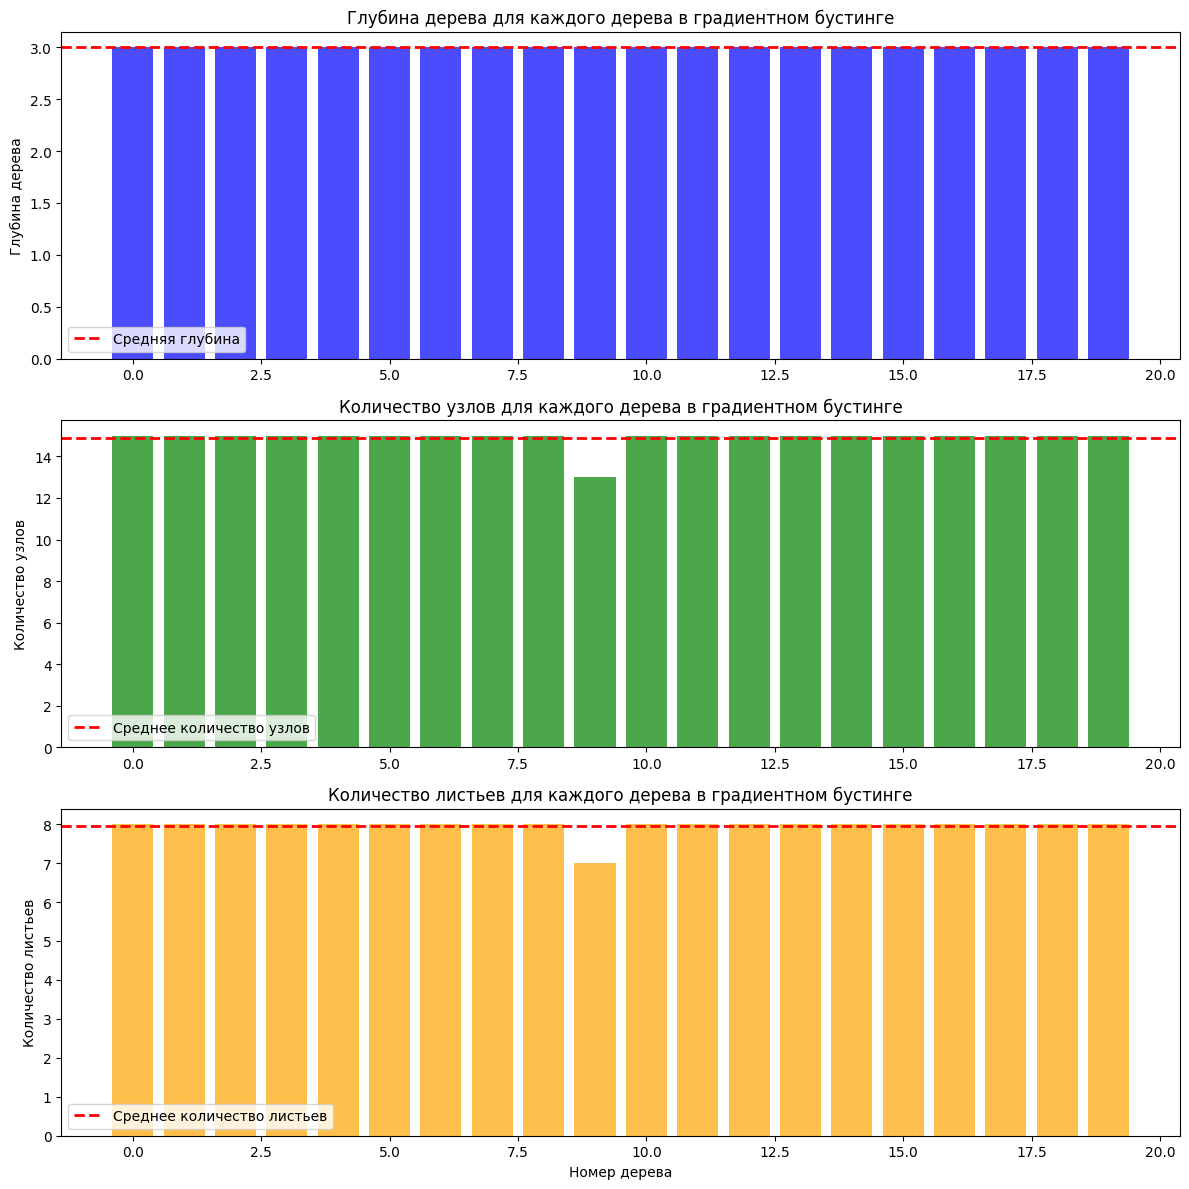

In [44]:
depths = []
node_counts = []
leaf_counts = []

for base_model_index, trees in enumerate(gb_model.estimators_):
    for tree_number, tree in enumerate(trees):
        depths.append(tree.tree_.max_depth)
        node_counts.append(tree.tree_.node_count)
        leaves = np.unique(tree.apply(X_train))
        leaf_counts.append(len(leaves))

average_depth = np.mean(depths)
average_node_count = np.mean(node_counts)
average_leaf_count = np.mean(leaf_counts)

print(f"Средняя глубина деревьев: {average_depth}")
print(f"Среднее количество узлов: {average_node_count}")
print(f"Среднее количество листьев: {average_leaf_count}")

# Построение столбчатых графиков
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# График для глубины
axes[0].bar(range(len(depths)), depths, color='blue', alpha=0.7)
axes[0].axhline(np.mean(depths), color='red', linestyle='dashed', linewidth=2, label='Средняя глубина')
axes[0].set_ylabel('Глубина дерева')
axes[0].set_title('Глубина дерева для каждого дерева в градиентном бустинге')
axes[0].legend()

# График для количества узлов
axes[1].bar(range(len(node_counts)), node_counts, color='green', alpha=0.7)
axes[1].axhline(np.mean(node_counts), color='red', linestyle='dashed', linewidth=2, label='Среднее количество узлов')
axes[1].set_ylabel('Количество узлов')
axes[1].set_title('Количество узлов для каждого дерева в градиентном бустинге')
axes[1].legend()

# График для количества листьев
axes[2].bar(range(len(leaf_counts)), leaf_counts, color='orange', alpha=0.7)
axes[2].axhline(np.mean(leaf_counts), color='red', linestyle='dashed', linewidth=2, label='Среднее количество листьев')
axes[2].set_xlabel('Номер дерева')
axes[2].set_ylabel('Количество листьев')
axes[2].set_title('Количество листьев для каждого дерева в градиентном бустинге')
axes[2].legend()

plt.tight_layout()
plt.show()

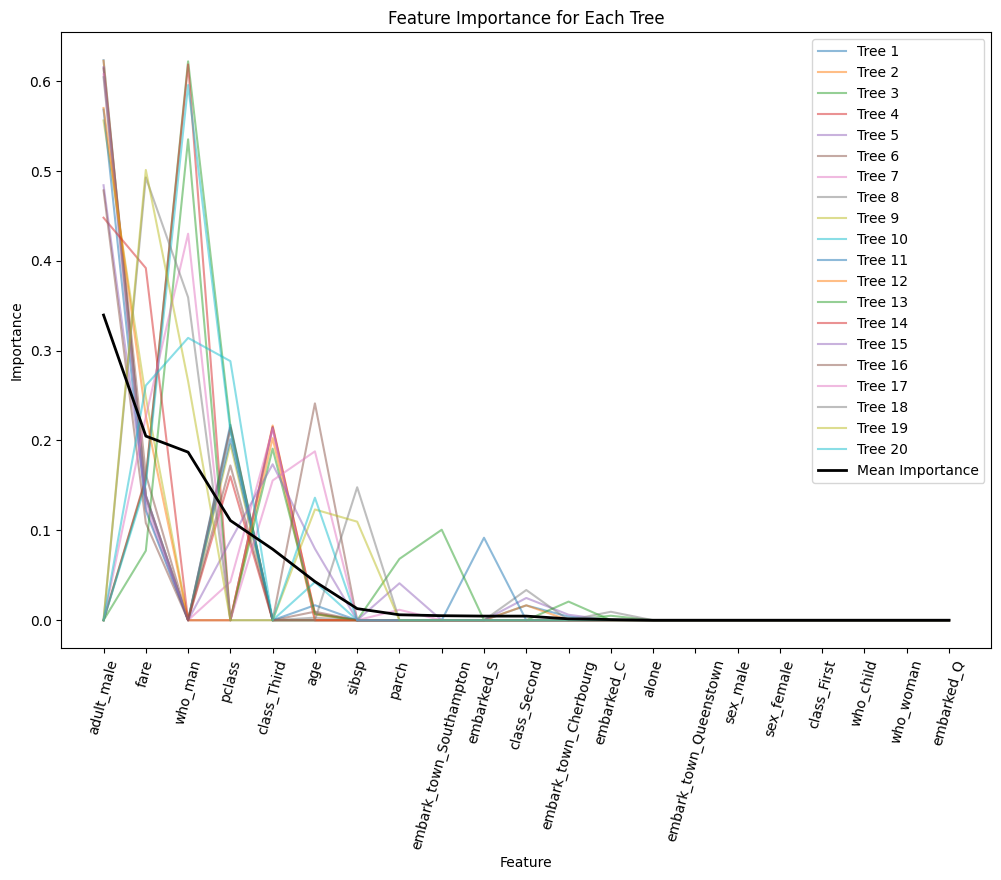

In [45]:
# Получение важности признаков для каждого дерева
feature_importance_per_tree = [tree.feature_importances_ for tree in gb_model.estimators_[:, 0]]

# Создание массива формы (число деревьев, число признаков)
importances_array = np.array(feature_importance_per_tree)

# Рассчитать среднюю важность для каждого признака
mean_importances = np.mean(importances_array, axis=0)

# Имена признаков из вашего набора данных
feature_names = X.columns

# Сортировка признаков по убыванию важности
sorted_idx = np.argsort(mean_importances)[::-1]

# Отображение важности признаков для каждого дерева
plt.figure(figsize=(12, 8))
for tree_idx in range(num_trees_to_display):
    plt.plot(importances_array[tree_idx, sorted_idx], alpha=0.5, label=f'Tree {tree_idx + 1}')

# Отображение средней важности
plt.plot(mean_importances[sorted_idx], color='black', linewidth=2, label='Mean Importance')

# Отображение имен признаков вместо их индексов
plt.xticks(range(len(feature_names)), feature_names[sorted_idx], rotation=75)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Each Tree')
plt.legend()
plt.show()

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Gradie

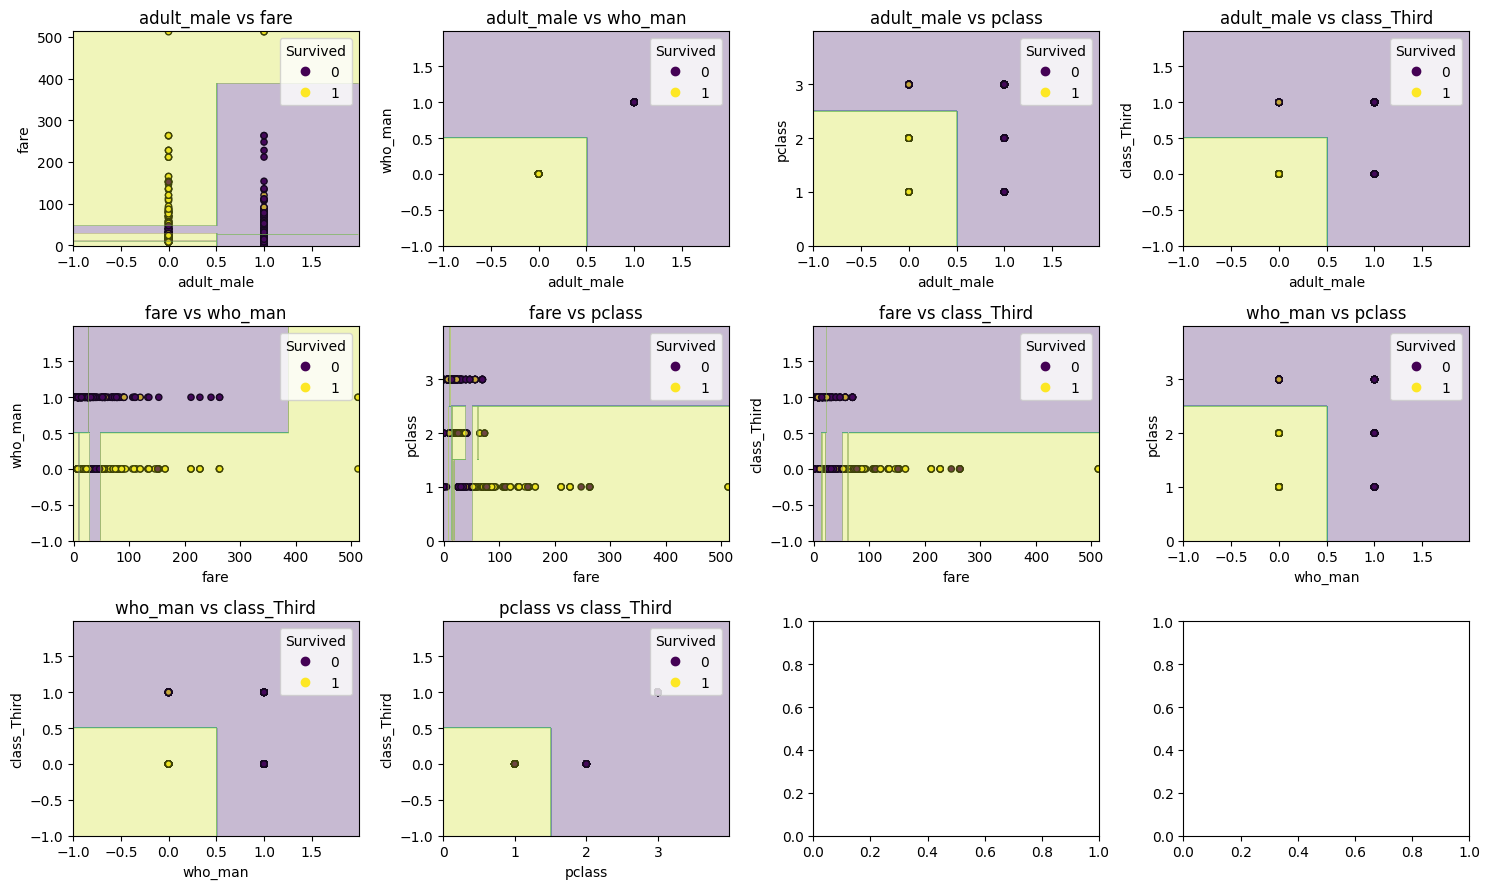

In [46]:
selected_features = ['adult_male', 'fare', 'who_man', 'pclass', 'class_Third']
printDividingPlaneBoost(selected_features, num_trees_to_display)

In [ ]:
# from xgboost import XGBClassifier, plot_importance, plot_tree

# # Создание модели градиентного бустинга
# xgb_model = XGBClassifier(n_estimators=20, max_depth=3, random_state=42)
# xgb_model.fit(X_train, y_train)

# # Вычисление значимости переменных
# plot_importance(xgb_model)
# plt.show()

# Каждая строка содержит информацию о разделении или листе:
# 0:[adult_male] yes=1,no=2: Это корневое разделение, которое проверяет условие adult_male (булева переменная). Если она истинна (yes), переход к узлу 1, в противном случае (no) - к узлу 2.
# 1:[pclass<3] yes=3,no=4,missing=4: В узле 1 проверяется условие pclass<3 (переменная класса). Если оно истинно (yes), переход к узлу 3, иначе (no) - к узлу 4. Если значение переменной отсутствует (missing), также переход к узлу 4.
# 3:leaf=0.724330187: Узел 3 - это лист, и он предсказывает значение 0.724330187.
# 4:[fare<23.4500008] yes=7,no=8,missing=8: Узел 4 проверяет условие fare<23.4500008 (стоимость билета). Если оно истинно (yes), переход к узлу 7, иначе (no) - к узлу 8. Если значение переменной отсутствует (missing), также переход к узлу 8.

In [ ]:
# from xgboost import XGBClassifier, plot_tree
# import matplotlib.pyplot as plt

# # Создание модели градиентного бустинга
# xgb_model = XGBClassifier(n_estimators=20, max_depth=3, random_state=42)
# xgb_model.fit(X_train, y_train)

# # Визуализация и сохранение деревьев в файлы
# for i in range(20):  # Замените 20 на количество деревьев в вашей модели
#     plt.figure(figsize=(20, 10))
#     plot_tree(xgb_model, num_trees=i, rankdir='LR')
#     plt.savefig(f'tree_{i}.png')
#     plt.close()

# # Отображение сохраненных изображений
# for i in range(20):
#     img = plt.imread(f'tree_{i}.png')
#     plt.figure(figsize=(20, 10))
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()

In [ ]:
# # Вывод списка построенных деревьев
# trees = xgb_model.get_booster().get_dump()
# for i, tree in enumerate(trees):
#     print(f"Tree {i+1}:\n{tree}")

In [ ]:
# # Получите дампы деревьев
# tree_dumps = xgb_model.get_booster().get_dump()

# # Инициализируйте счетчики для средней глубины и среднего числа листьев
# total_depth = 0
# total_leaves = 0

# # Проанализируйте каждый дамп
# for tree_dump in tree_dumps:
#     # Разбейте дамп на строки, представляющие узлы дерева
#     tree_lines = tree_dump.split('\n')
    
#     # Посчитайте глубину дерева и количество листьев
#     depth = max([line.count('\t') for line in tree_lines]) + 1
#     leaves = tree_lines[-1].count(':') + 1
    
#     # Обновите счетчики
#     total_depth += depth
#     total_leaves += leaves

# # Рассчитайте среднюю глубину и среднее количество листьев
# average_depth = total_depth / len(tree_dumps)
# average_leaves = total_leaves / len(tree_dumps)

# print(f"Средняя глубина: {average_depth}")
# print(f"Среднее количество листьев: {average_leaves}")

# 3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.

In [14]:
# Список глубин дерева, которые вы хотите проверить
depths = np.arange(1, 25)

train_scores = []
cv_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Оценка качества на обучении
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)
    
    # если нужно построить рещающие плоскости на определенной итерации
    # if (depth == 22):
    #     feature_importance = model.feature_importances_
    #     feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    #     feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    #     selected_features = feature_importance_df[:4]['Feature']
    #     printDividingPlane(selected_features, depth)
    
    # Оценка качества на скользящем контроле
    model1 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    cv_score = np.mean(cross_val_score(model1, X_train, y_train, cv=5))
    cv_scores.append(cv_score)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

# без крос валидации
- Глубина 5

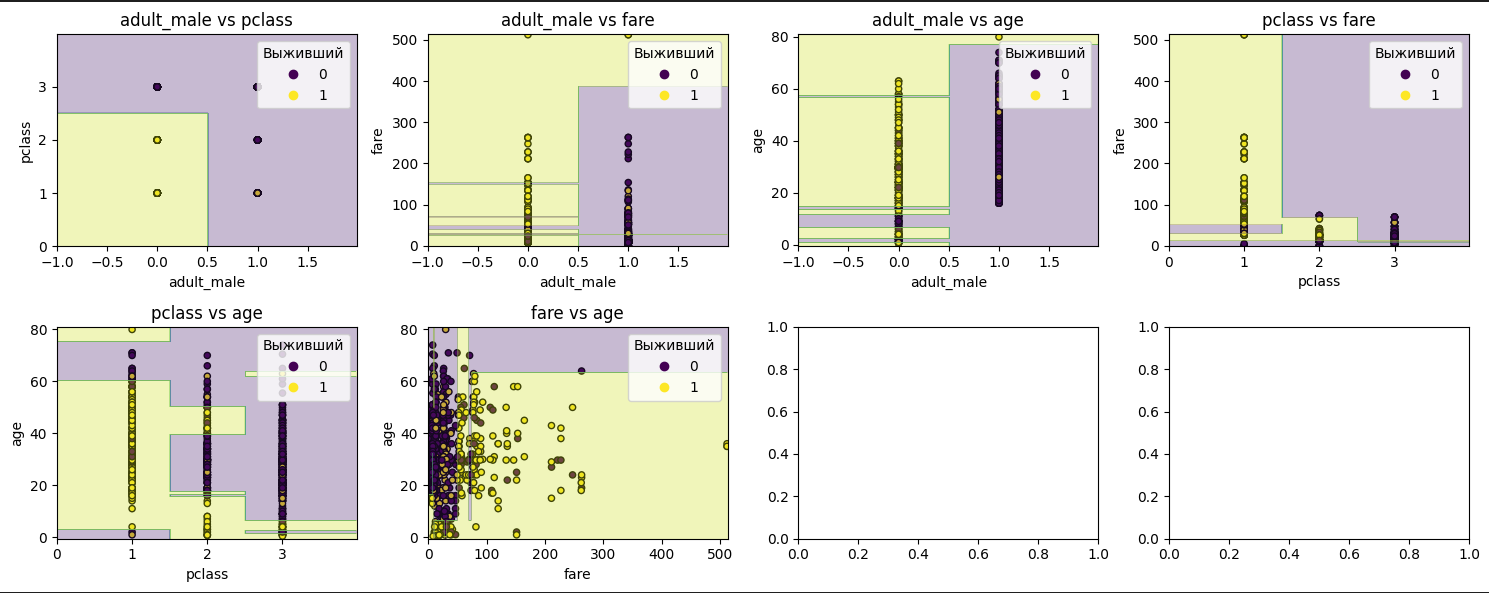

- Глубина 6

adult_male  fare  age  pclass

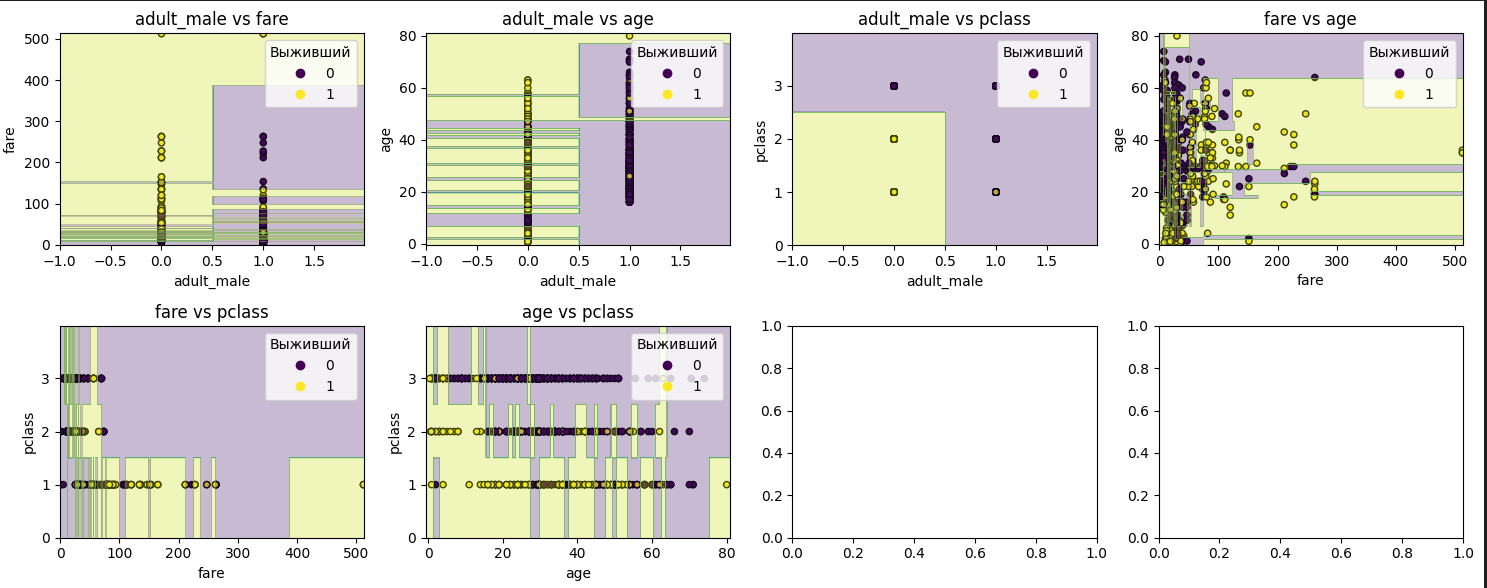

- Глубина 22

adult_male  fare  age  pclass

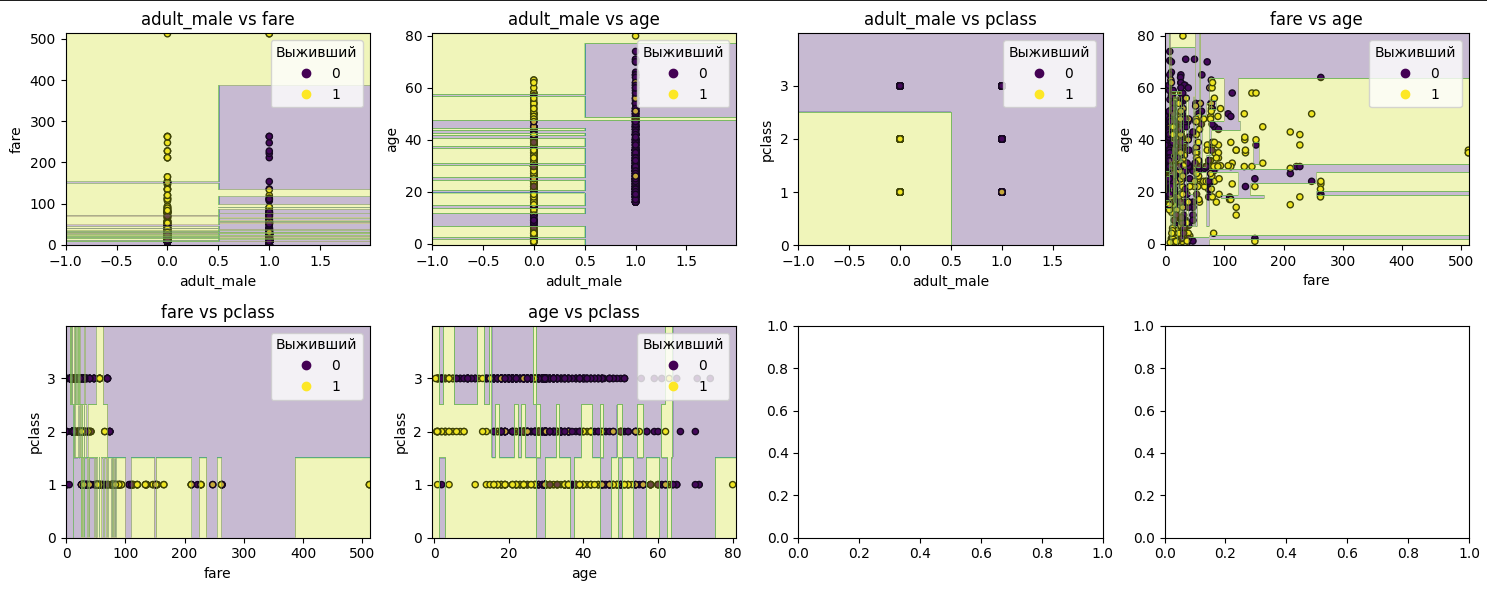

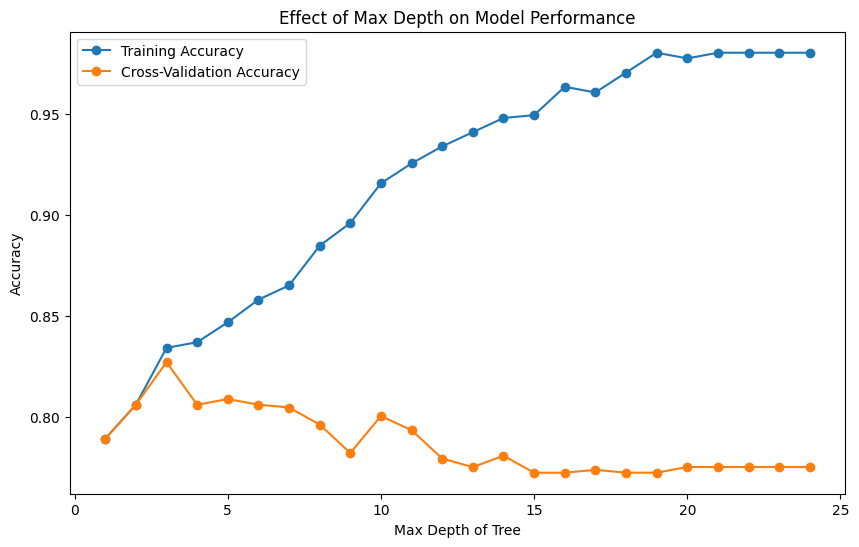

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(depths, cv_scores, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth on Model Performance')
plt.legend()
plt.show()

# 4. Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.
Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров.

In [25]:
# print(np.arange(1, 141, 10))
# print(np.arange(1, 31, 5))

[  1  11  21  31  41  51  61  71  81  91 101 111 121 131]
[ 1  6 11 16 21 26]


In [52]:
# Список глубин дерева, которые вы хотите проверить
depths = np.arange(1, 31, 5)

train_scores = []
cv_scores = []

# Перебор разных глубин дерева
for depth in depths:
    # Список числа деревьев, которые вы хотите проверить
    n_trees = np.arange(1, 141, 10)
    
    # Список для хранения результатов для данной глубины
    depth_train_scores = []
    depth_cv_scores = []
    
    # Перебор разного числа деревьев
    for n_tree in n_trees:
        model = GradientBoostingClassifier(n_estimators=n_tree, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        
        # Оценка качества на обучении
        train_score = model.score(X_train, y_train)
        depth_train_scores.append(train_score)
        
        # Оценка качества на скользящем контроле
        model1 = GradientBoostingClassifier(n_estimators=n_tree, max_depth=depth, random_state=42)
        cv_score = np.mean(cross_val_score(model1, X_train, y_train, cv=5))
        depth_cv_scores.append(cv_score)
    
    train_scores.append(depth_train_scores)
    cv_scores.append(depth_cv_scores)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

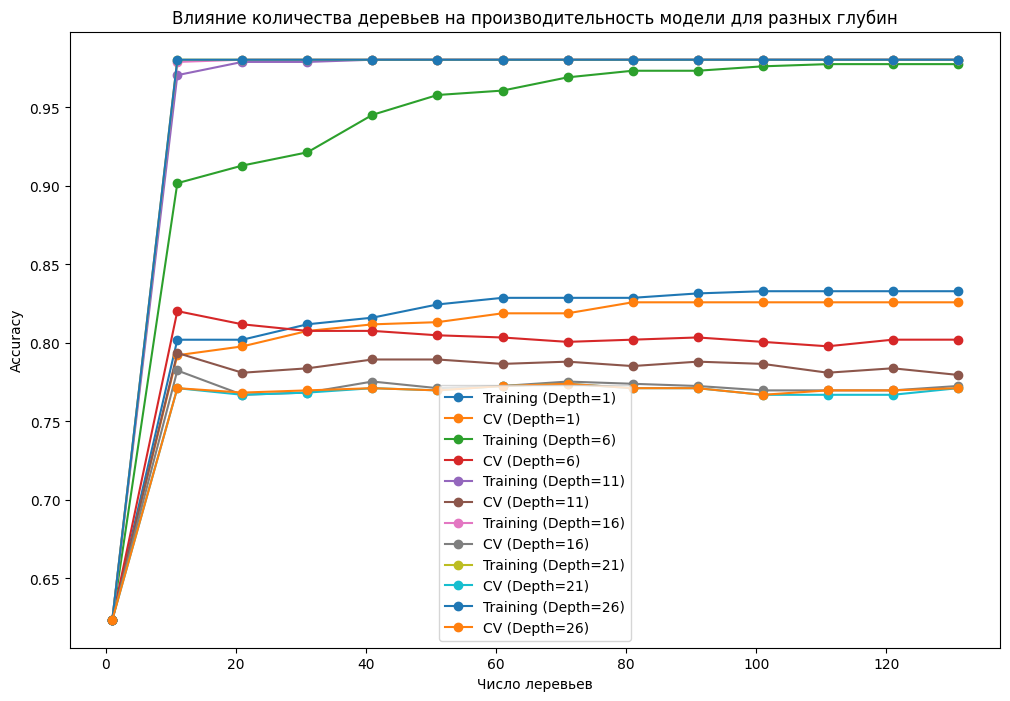

In [53]:
# Построение графиков
plt.figure(figsize=(12, 8))

for i, depth in enumerate(depths):
    plt.plot(n_trees, train_scores[i], label=f'Training (Depth={depth})', marker='o')
    plt.plot(n_trees, cv_scores[i], label=f'CV (Depth={depth})', marker='o')

plt.xlabel('Число леревьев')
plt.ylabel('Accuracy')
plt.title('Влияние количества деревьев на производительность модели для разных глубин')
plt.legend()
plt.show()

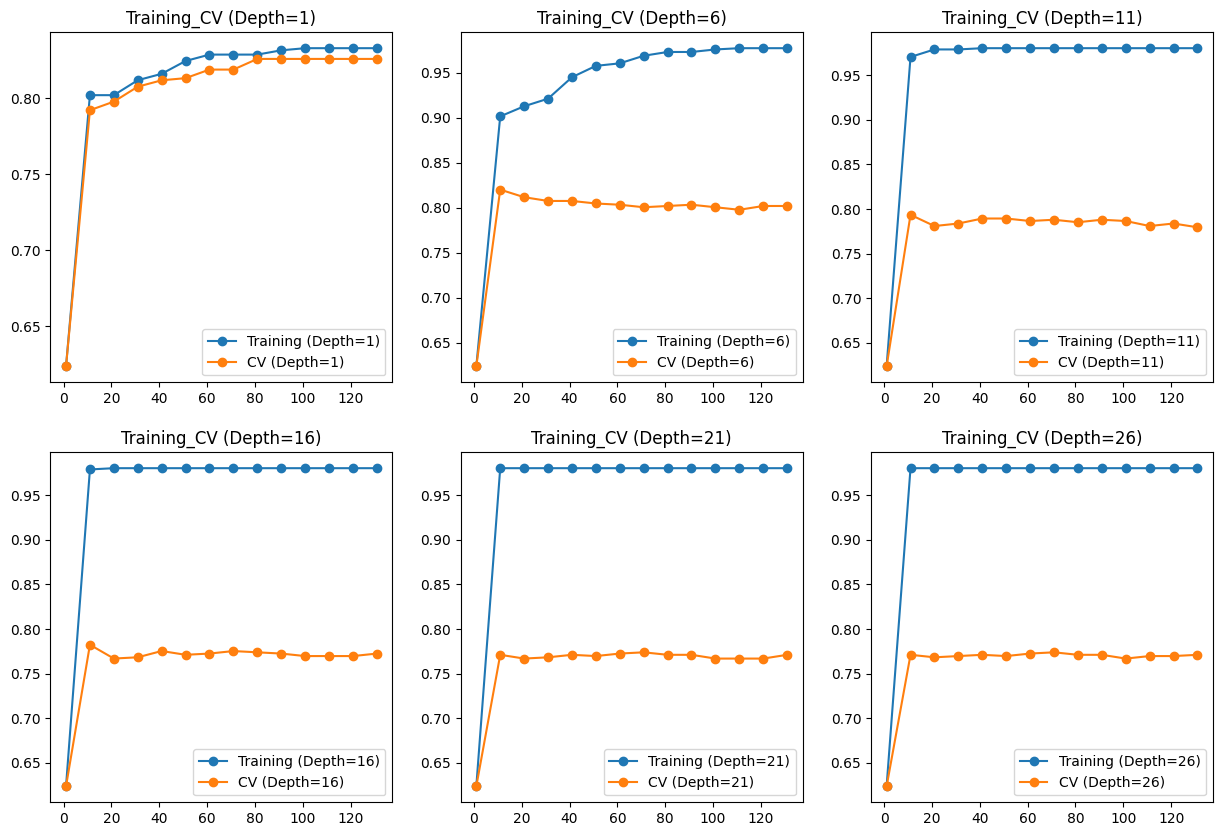

In [54]:
plt.figure(figsize=(15, 10))

for i, depth in enumerate(depths):
    plt.subplot(2, 3, i + 1)
    plt.title(f'Training_CV (Depth={depth})')

    plt.plot(n_trees, train_scores[i], label=f'Training (Depth={depth})', marker='o')
    plt.plot(n_trees, cv_scores[i], label=f'CV (Depth={depth})', marker='o')
    plt.legend()
plt.show()

# 5. Выполнить предыдущий пункт для случайного леса.

Случайный лес (Random Forest) - это ансамбль моделей, который объединяет несколько деревьев решений для получения более устойчивого и точного предсказания. Вот основные шаги, по которым работает случайный лес:

Каждое дерево строится на случайной подвыборке данных (бутстрап) и использует только случайное подмножество признаков при каждом разделении узла. Это делается для уменьшения корреляции между деревьями, что способствует повышению обобщающей способности.

In [55]:
# Список глубин дерева, которые вы хотите проверить
depths = np.arange(2, 32, 5)

# Список для хранения результатов
train_scores = []
cv_scores = []

# Перебор разных глубин дерева
for depth in depths:
    # Список числа деревьев, которые вы хотите проверить
    n_trees = np.arange(1, 141, 10)
    
    # Список для хранения результатов для данной глубины
    depth_train_scores = []
    depth_cv_scores = []
    
    # Перебор разного числа деревьев
    for n_tree in n_trees:
        # Создание и обучение модели
        model = RandomForestClassifier(n_estimators=n_tree, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        
        # Оценка качества на обучении
        train_score = model.score(X_train, y_train)
        depth_train_scores.append(train_score)
        
        # Оценка качества на скользящем контроле
        model1 = RandomForestClassifier(n_estimators=n_tree, max_depth=depth, random_state=42)
        cv_score = np.mean(cross_val_score(model1, X_train, y_train, cv=5))
        depth_cv_scores.append(cv_score)
    
    # Добавление результатов для данной глубины в общие списки
    train_scores.append(depth_train_scores)
    cv_scores.append(depth_cv_scores)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

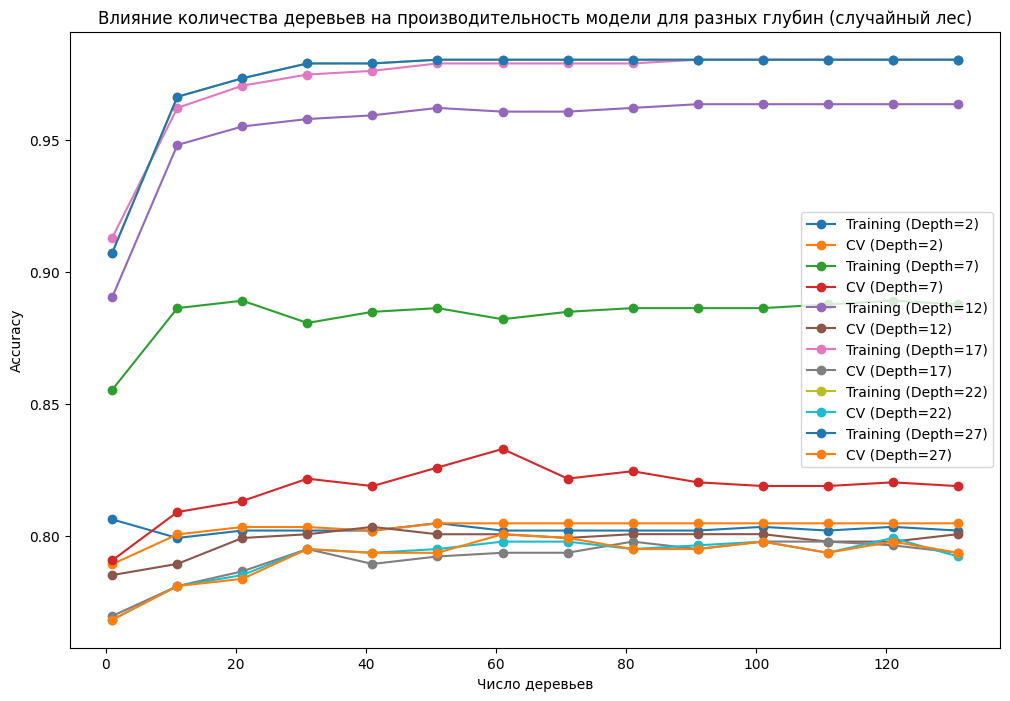

In [56]:
# Построение графиков
plt.figure(figsize=(12, 8))

for i, depth in enumerate(depths):
    plt.plot(n_trees, train_scores[i], label=f'Training (Depth={depth})', marker='o')
    plt.plot(n_trees, cv_scores[i], label=f'CV (Depth={depth})', marker='o')

plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.title('Влияние количества деревьев на производительность модели для разных глубин (случайный лес)')
plt.legend()
plt.show()

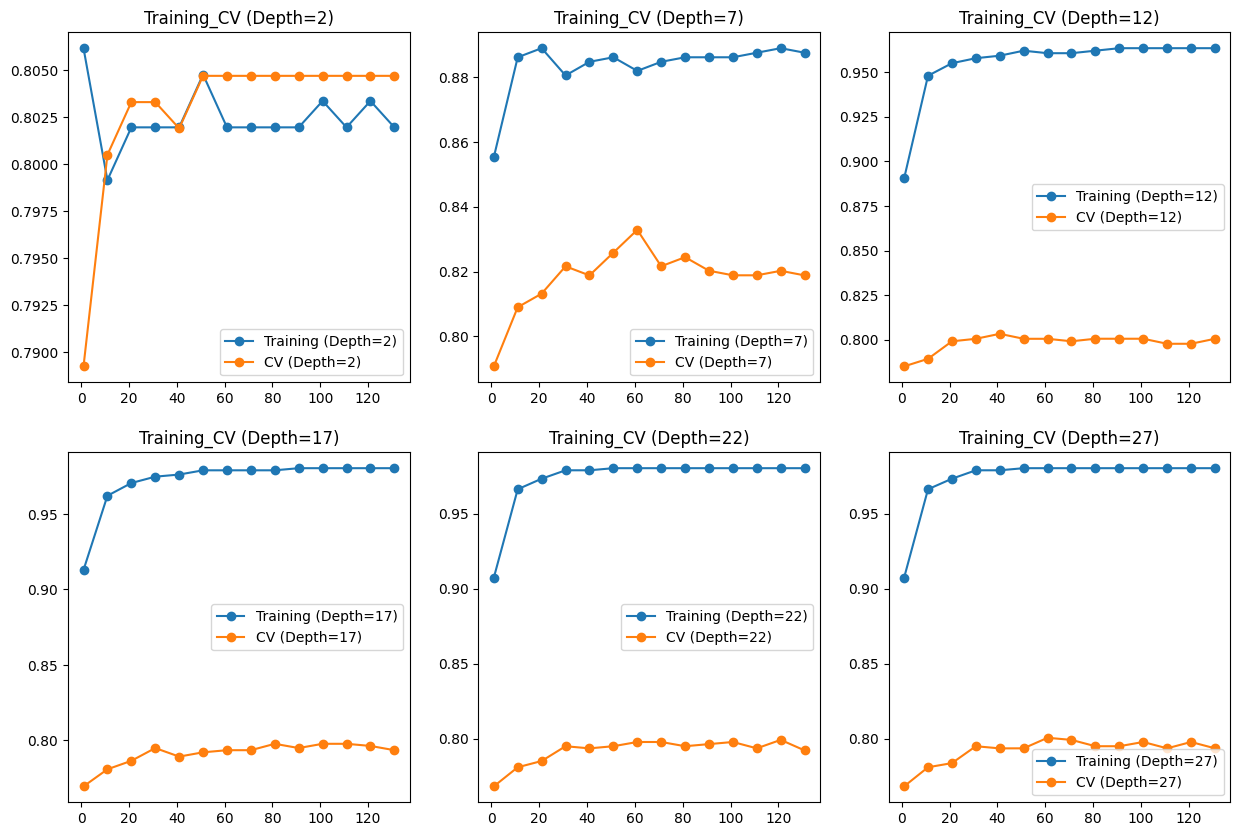

In [57]:
plt.figure(figsize=(15, 10))

for i, depth in enumerate(depths):
    plt.subplot(2, 3, i + 1)
    plt.title(f'Training_CV (Depth={depth})')

    plt.plot(n_trees, train_scores[i], label=f'Training (Depth={depth})', marker='o')
    plt.plot(n_trees, cv_scores[i], label=f'CV (Depth={depth})', marker='o')
    plt.legend()
plt.show()

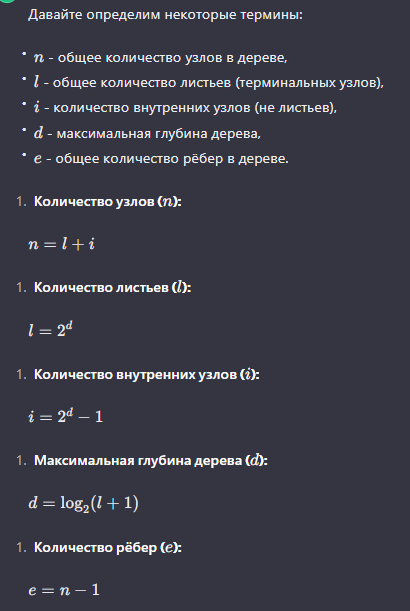

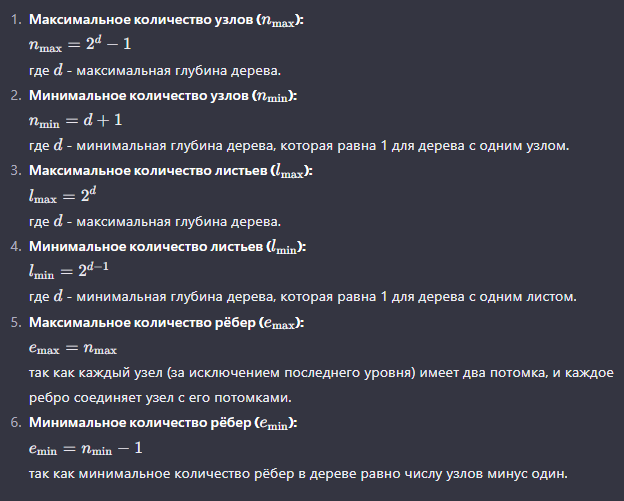